**Fraud detection ML**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#pd.set_option('future.no_silent_downcasting', True)

In [30]:
dataset_path = 'card_transdata.csv'
#Limit: (,nrows=x)
df = pd.read_csv(dataset_path)

df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [31]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [32]:
#Summary statistics
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


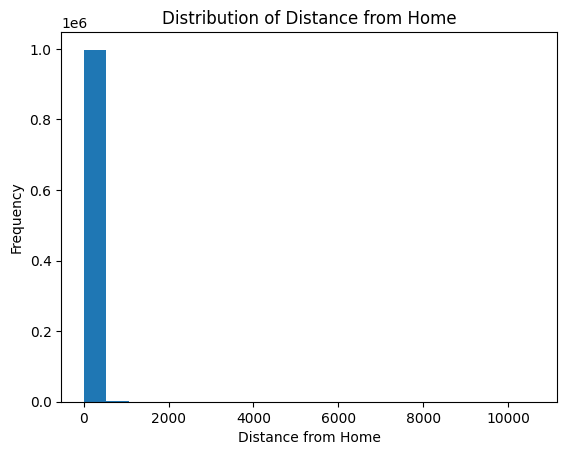

In [33]:
#Data distribution
import matplotlib.pyplot as plt

plt.hist(df['distance_from_home'], bins=20)
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.title('Distribution of Distance from Home')
plt.show()


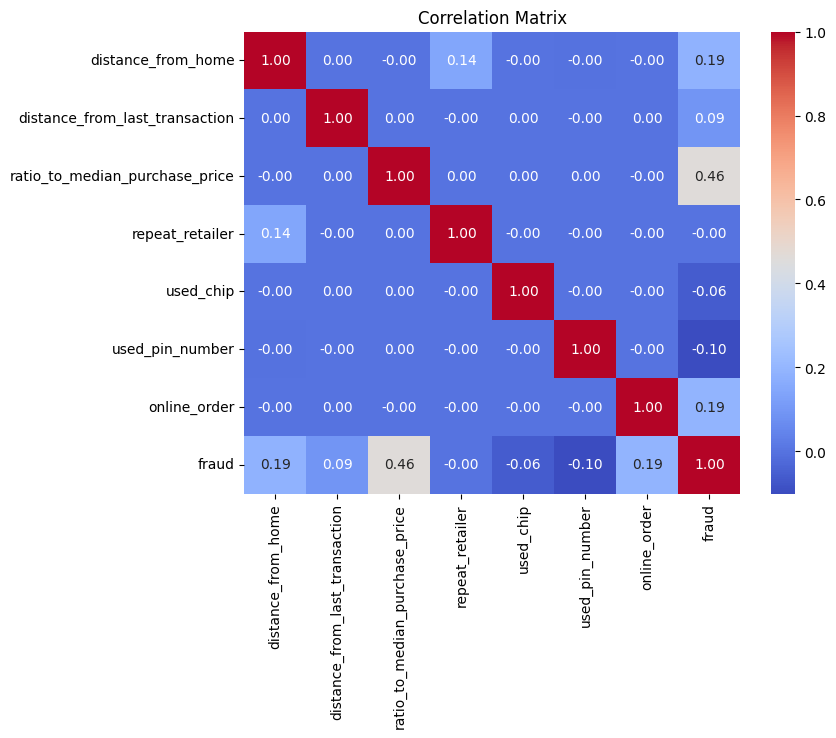

In [34]:
#Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [35]:
#Class distribution
fraud_distribution = df['fraud'].value_counts()
print(fraud_distribution)

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


In [36]:
#Missing values and outliers
import pandas as pd

df = pd.read_csv('card_transdata.csv')
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

numerical_columns = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
outliers = pd.DataFrame()
for col in numerical_columns:
    col_mean = df[col].mean()
    col_std = df[col].std()
    col_outliers = df[(df[col] - col_mean).abs() > 3 * col_std]
    outliers = pd.concat([outliers, col_outliers])

print("\nOutliers:\n", outliers)

categorical_columns = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
for col in categorical_columns:
    unique_values = df[col].unique()
    value_counts = df[col].value_counts()
    print(f"\nUnique values for {col}:\n", unique_values)
    print(f"\nValue counts for {col}:\n", value_counts)


Missing values:
 distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Outliers:
         distance_from_home  distance_from_last_transaction  \
12              765.282559                        0.371562   
112             335.189320                        1.114168   
196             242.913187                        4.424776   
220             248.064049                        0.171596   
261             601.522919                        0.028723   
...                    ...                             ...   
999883           14.850909                        7.218322   
999902           70.272698                        0.307762   
999939           51.412900                        3.429330   
999949           15.724799                        

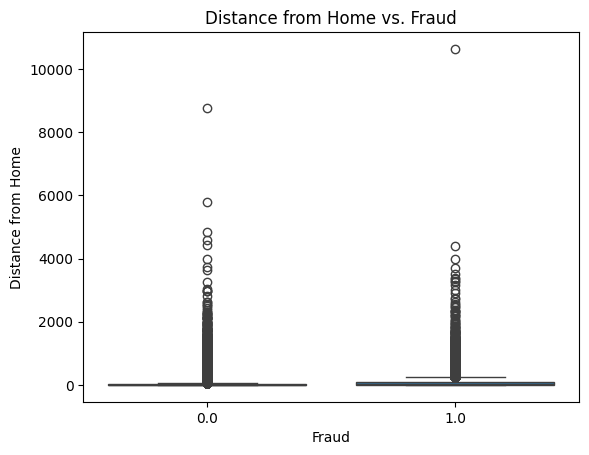

In [37]:
#Feature Analysis
sns.boxplot(x='fraud', y='distance_from_home', data=df)
plt.xlabel('Fraud')
plt.ylabel('Distance from Home')
plt.title('Distance from Home vs. Fraud')
plt.show()


In [38]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


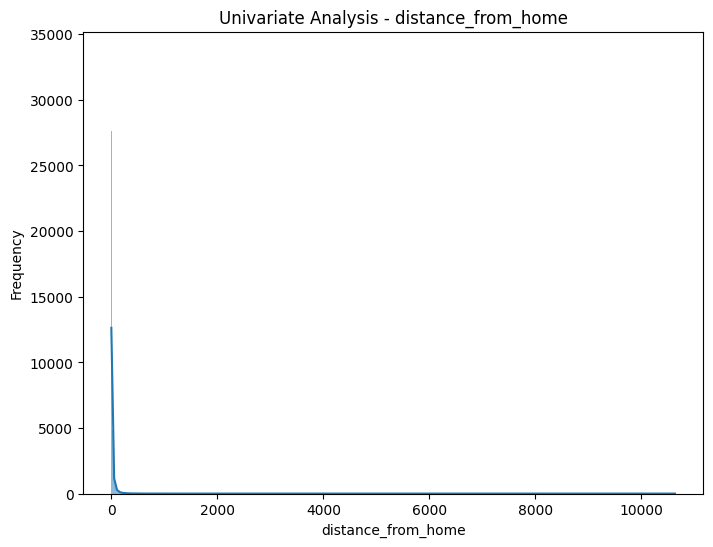

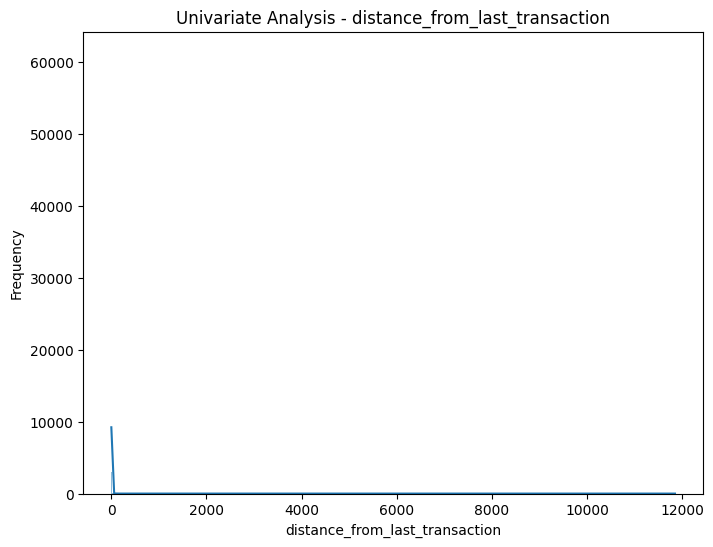

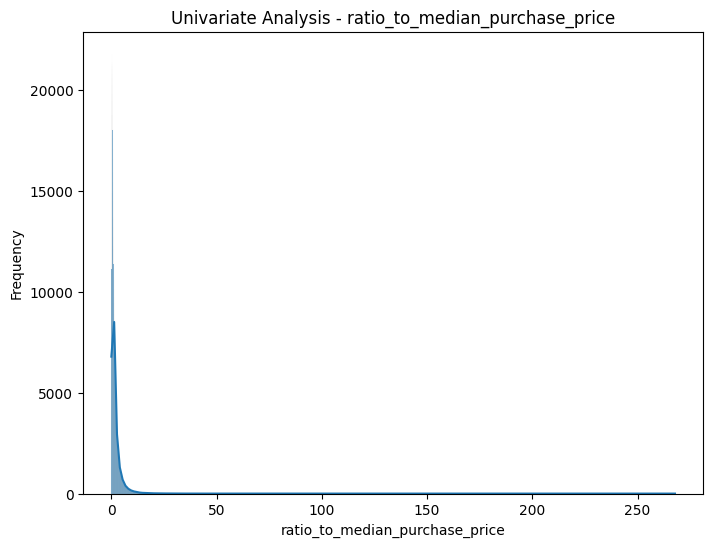

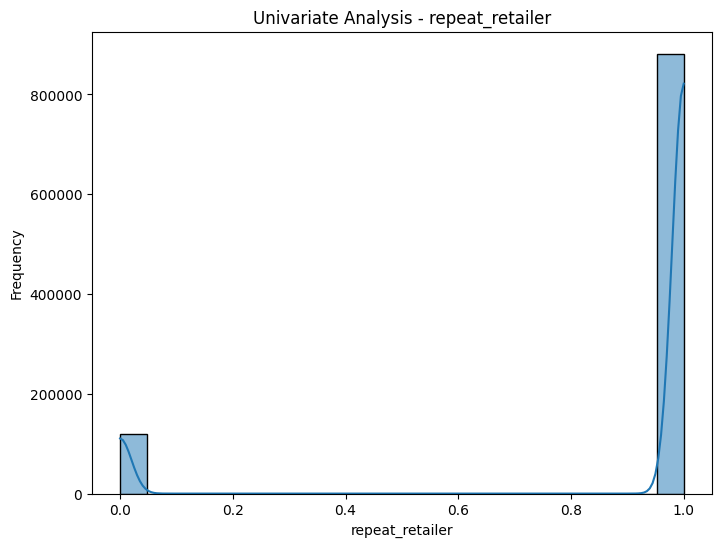

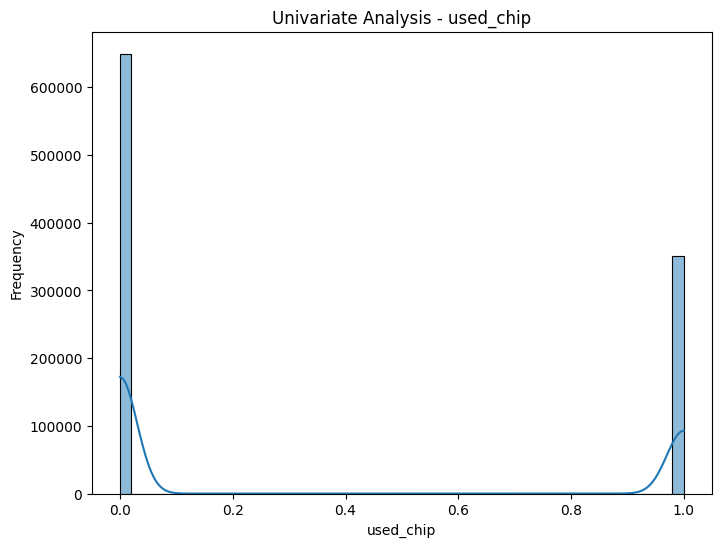

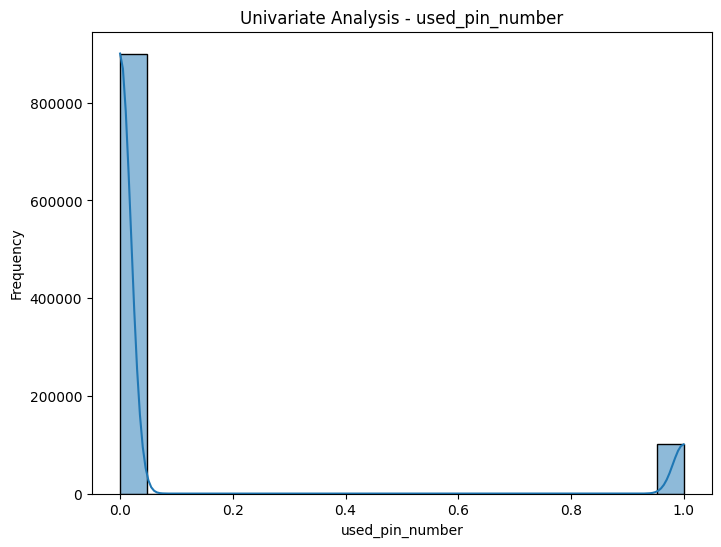

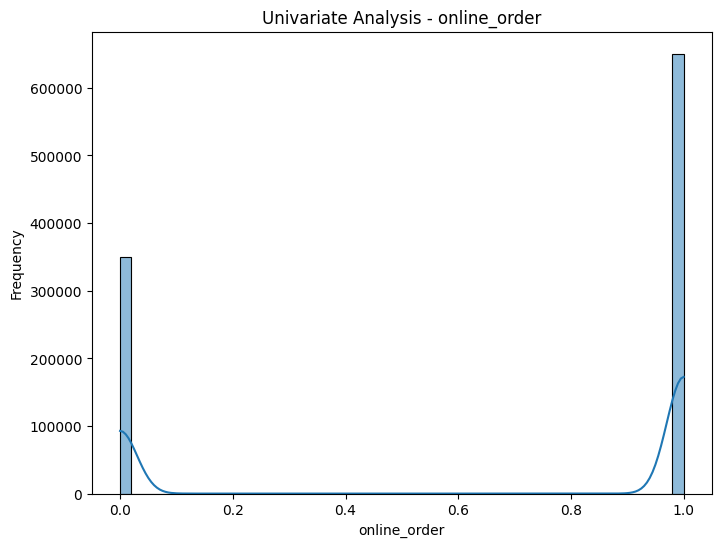

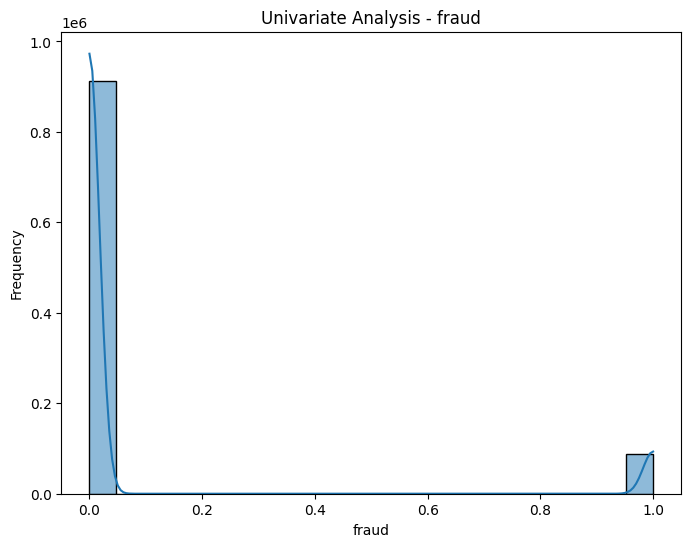

In [39]:

# Univariate Analysis

# Numeric Variables
numeric_vars = df.select_dtypes(include=[np.number]).columns
for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Univariate Analysis - {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
   
# Categorical Variables
categorical_vars = df.select_dtypes(include=[object]).columns
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var)
    plt.title(f'Univariate Analysis - {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

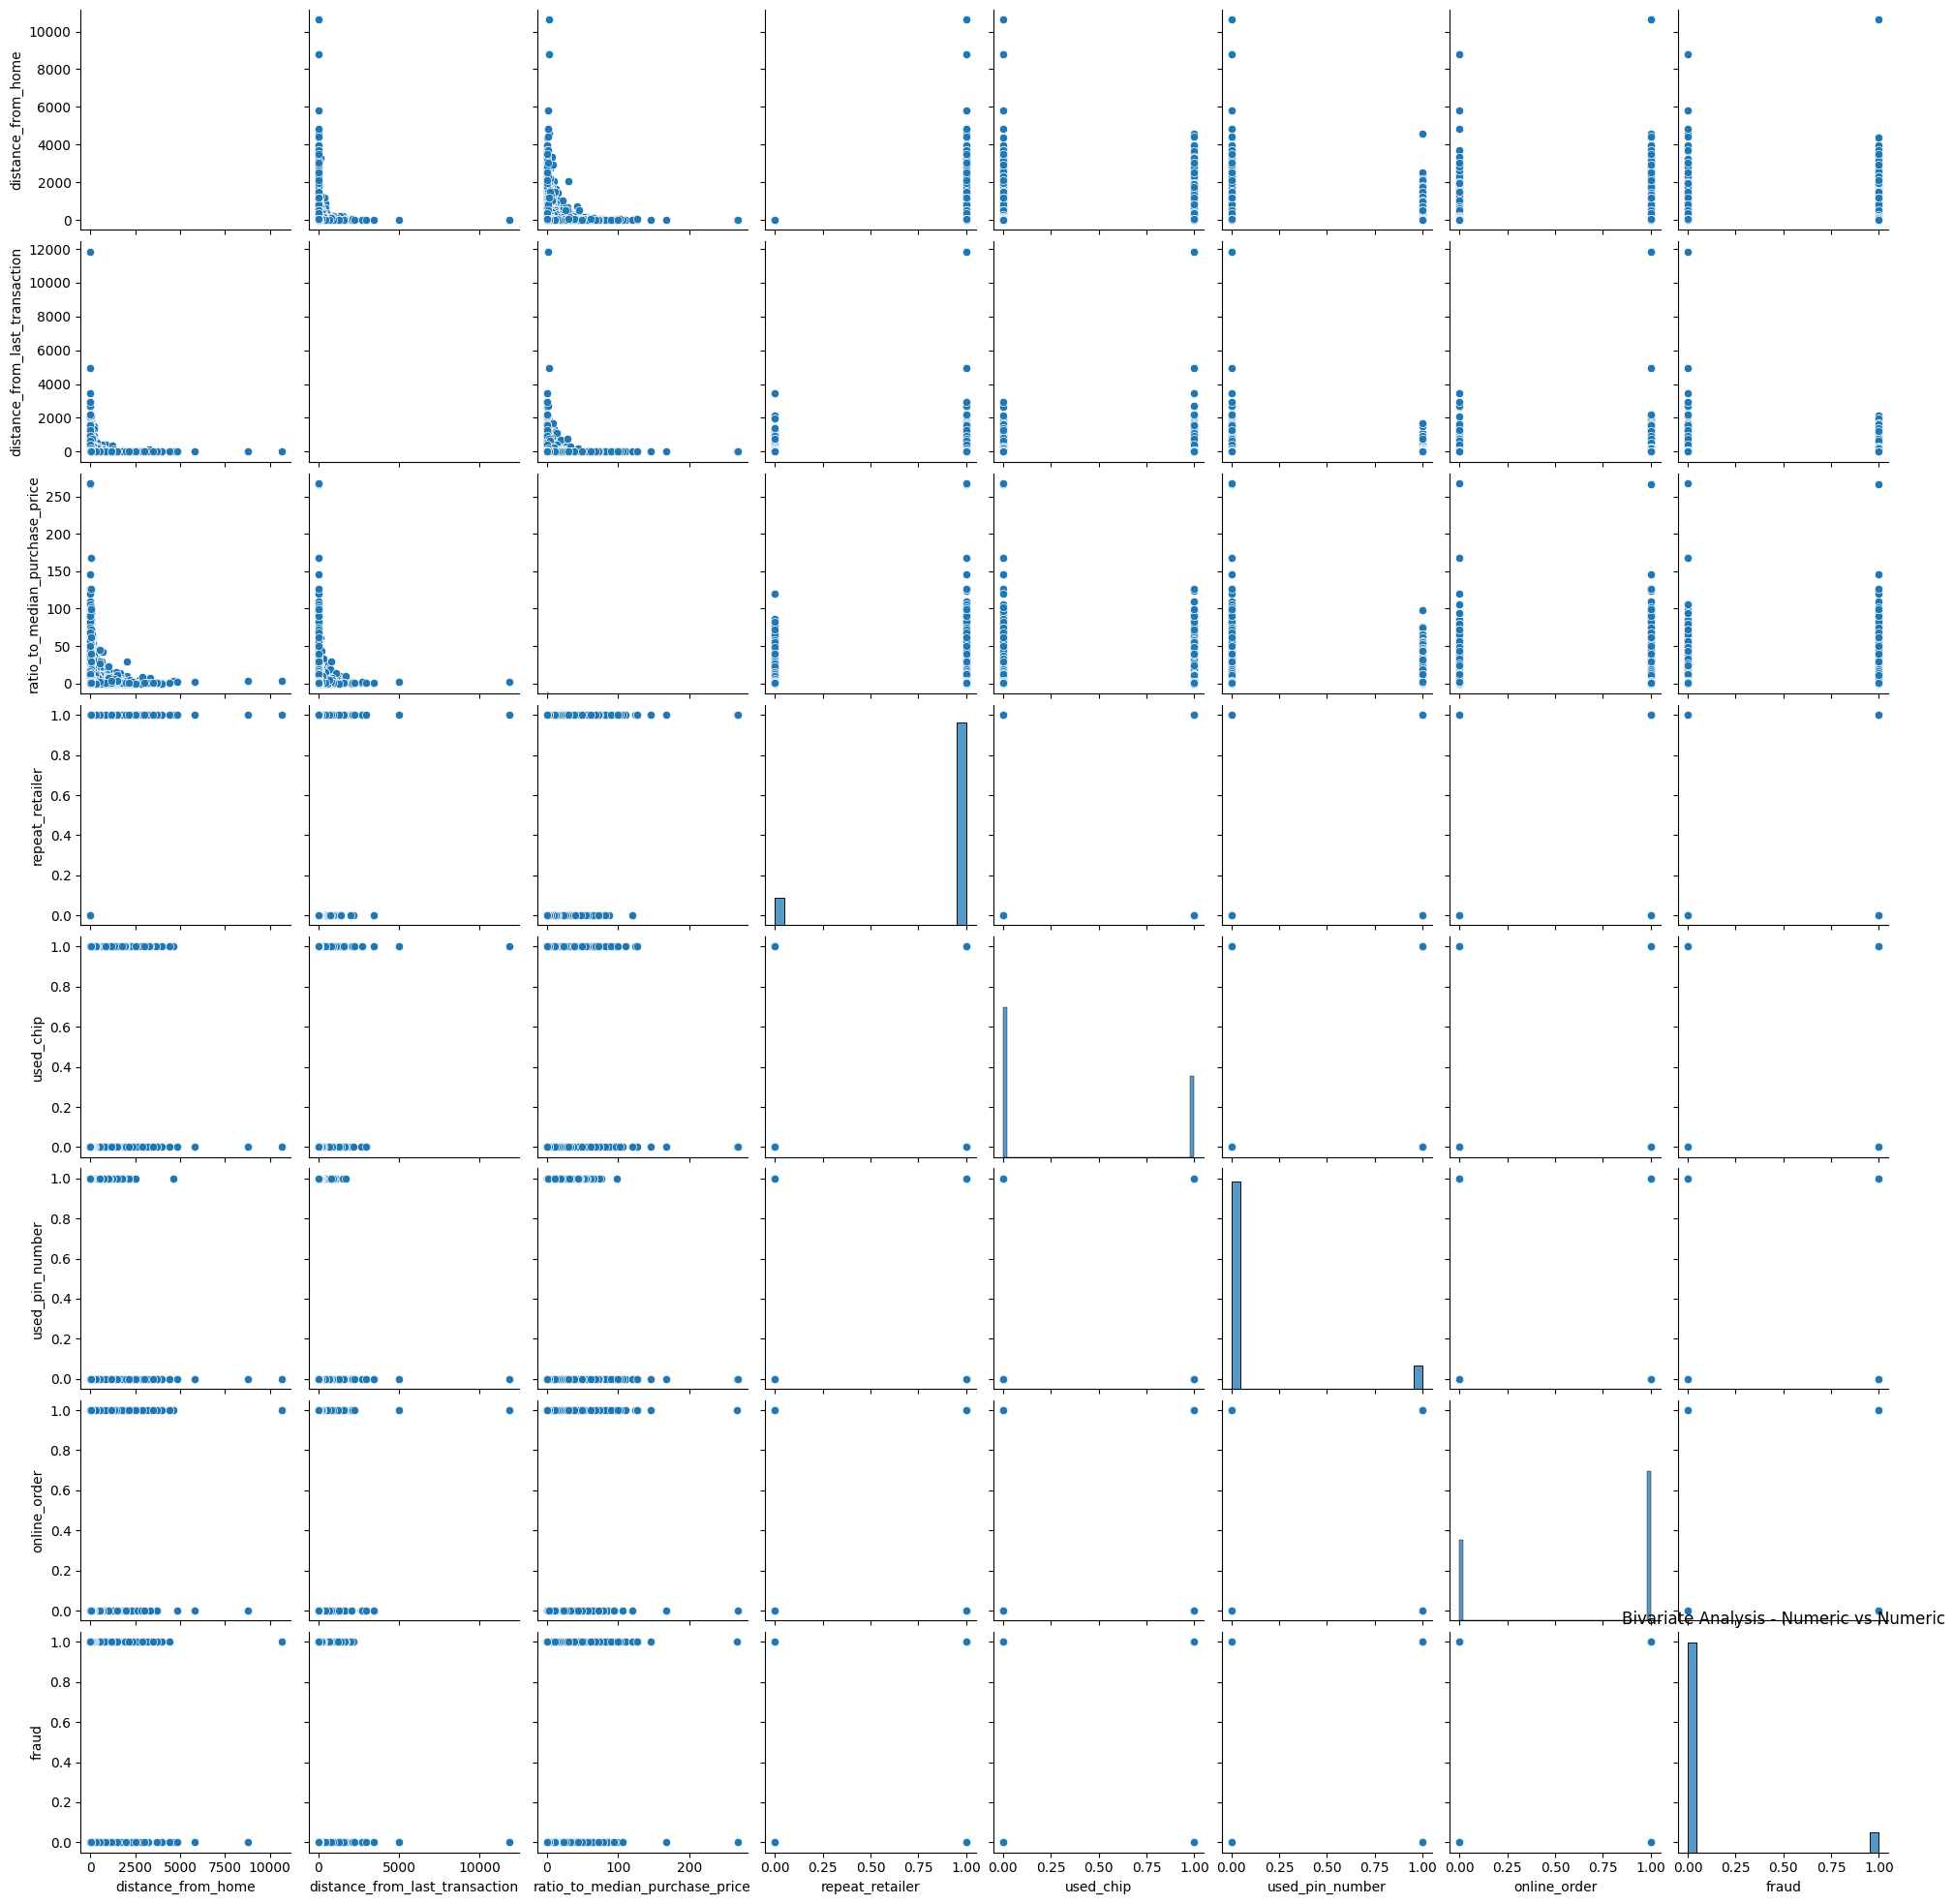

In [40]:

# Bivariate Analysis    
# Numeric vs Numeric
numeric_vars = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[numeric_vars])
plt.title('Bivariate Analysis - Numeric vs Numeric')
plt.show()
  
# Numeric vs Categorical
categorical_vars = df.select_dtypes(include=[object]).columns
for cat_var in categorical_vars:
    for num_var in numeric_vars:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=cat_var, y=num_var)
        plt.title(f'Bivariate Analysis - {cat_var} vs {num_var}')
        plt.xlabel(cat_var)
        plt.ylabel(num_var)
        plt.xticks(rotation=45)
        plt.show()

In [41]:
label = 'fraud'
X = df.drop(columns=[label], inplace=False)
y = df[label]

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shape of splitted data
print(
    f'Training dataset \
    \nX_train: {X_train.shape[0]/len(X)*100:.0f}% \ny_train: {y_train.shape[0]/len(X)*100:.0f}% \
    \n\nValidation dataset \
    \nX_val: {X_val.shape[0]/len(X)*100:.0f}% \ny_val: {y_val.shape[0]/len(X)*100:.0f}%'
)

Training dataset     
X_train: 80% 
y_train: 80%     

Validation dataset     
X_val: 20% 
y_val: 20%


In [43]:
acc_baseline = y_train.value_counts(normalize=True).max()

# Print the benchmark
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.91


In [44]:
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True,cols=['repeat_retailer','used_chip','used_pin_number','online_order']),
    LogisticRegression(max_iter=1000)
)
# Fit model to training data
model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['repeat_retailer', 'used_chip',
                                     'used_pin_number', 'online_order'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [45]:
lr_train_acc = model_lr.score(X_train, y_train)
lr_val_acc = model_lr.score(X_val, y_val)

print("Logistic Regression, Training Accuracy Score:", lr_train_acc)
print("Logistic Regression, Validation Accuracy Score:", lr_val_acc)

Logistic Regression, Training Accuracy Score: 0.95881875
Logistic Regression, Validation Accuracy Score: 0.958715


In [46]:
model_lr.predict(X_val)

array([0., 0., 0., ..., 1., 0., 0.])

In [47]:
y_train_pred_proba = model_lr.predict_proba(X_val)
print(y_train_pred_proba[:5])

[[9.66111348e-01 3.38886522e-02]
 [7.33384527e-01 2.66615473e-01]
 [9.99928201e-01 7.17990128e-05]
 [6.95920834e-01 3.04079166e-01]
 [9.99892226e-01 1.07774298e-04]]


In [48]:
features = model_lr.named_steps["onehotencoder"].get_feature_names_out()
coefs = model_lr.named_steps["logisticregression"].coef_[0]

In [49]:


odds_ratios = pd.Series(np.exp(coefs), index=features).sort_values()
odds_ratios.head()

used_pin_number_1.0    0.000112
online_order_0.0       0.003193
used_chip_1.0          0.052776
repeat_retailer_1.0    0.065291
repeat_retailer_0.0    0.120735
dtype: float64

In [50]:
plt.Figure(figsize=(15,10))
fig = px.bar(
    data_frame=odds_ratios, 
    x=odds_ratios[:15].values, 
    y=odds_ratios[:15].index, 
    title="Customer Churn Logistic Regression, Feature Importance (Odds Ratio)"
)

fig.update_layout(xaxis_title='Odds Ratio', yaxis_title='')
fig.show()

In [51]:
depth_hyperparams = range(1, 16)

# List of scores per each set for visualization purpose
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    
    # Build model
    model_dt = make_pipeline(
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    
    # Fit model
    model_dt.fit(X_train, y_train)
    
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(model_dt.score(X_train, y_train))
    
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(model_dt.score(X_val, y_val))

In [52]:
tune_data = pd.DataFrame(
    data = {'Training': training_acc, 'Validation': validation_acc}, 
    index=depth_hyperparams
)

# Display the figure
fig = px.line(
    data_frame=tune_data, 
    x=depth_hyperparams, 
    y=['Training', 'Validation'], 
    title="Training & Validation Curves (Decision Tree Model)"
)

# Add axes titles
fig.update_layout(xaxis_title ="Maximum Depth", yaxis_title="Acccuracy Score")
fig.show()

In [53]:
import joblib
final_model_dt = make_pipeline(
    DecisionTreeClassifier(max_depth=6, random_state=42)
)

# Fit Final Model
final_model_dt.fit(X_train, y_train)

file = 'final_model_dt.joblib'
joblib.dump(final_model_dt, file)

['final_model_dt.joblib']

In [54]:
y_val_pred = final_model_dt.predict(X_val)
y_val_pred[:5]

array([0., 0., 0., 0., 0.])

In [55]:
print(f'Final model accuracy: {accuracy_score(y_val, final_model_dt.predict(X_val))}')

Final model accuracy: 0.99993


# Dash

In [56]:
import dash
from dash import html, dcc, Input, Output, State
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Load pre-trained model
file = 'final_model_dt.joblib'
model = joblib.load(file)

# Define Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.Div([
        html.Label('Distance from Home'),
        html.Br(),
        dcc.Input(id='distance_from_home', type='number', value=0),
        html.Br(),
        html.Label('Distance from Last Transaction'),
        html.Br(),
        dcc.Input(id='distance_from_last_transaction', type='number', value=0),
        html.Br(),
        html.Label('Ratio to Median Purchase Price'),
        html.Br(),
        dcc.Input(id='ratio_to_median_purchase_price', type='number', value=0),
        html.Br(),
        html.Label('Repeat Retailer'),
        html.Br(),
        dcc.Input(id='repeat_retailer', type='number', value=0),
        html.Br(),
        html.Label('Used Chip'),
        html.Br(),
        dcc.Input(id='used_chip', type='number', value=0),
        html.Br(),
        html.Label('Used Pin Number'),
        html.Br(),
        dcc.Input(id='used_pin_number', type='number', value=0),
        html.Br(),
        html.Label('Online Order'),
        html.Br(),
        dcc.Input(id='online_order', type='number', value=0),
        html.Br(),
        html.Button('Predict', id='predict-button', n_clicks=0),
        html.Div(id='prediction-output')
    ])
])

# Define callback to make predictions
@app.callback(
    Output('prediction-output', 'children'),
    [Input('predict-button', 'n_clicks')],
    [
        State('distance_from_home', 'value'),
        State('distance_from_last_transaction', 'value'),
        State('ratio_to_median_purchase_price', 'value'),
        State('repeat_retailer', 'value'),
        State('used_chip', 'value'),
        State('used_pin_number', 'value'),
        State('online_order', 'value')
    ]
)
def predict_fraud(n_clicks, distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order):
    # Preprocess input data
    data = pd.DataFrame({
        'distance_from_home': [distance_from_home],
        'distance_from_last_transaction': [distance_from_last_transaction],
        'ratio_to_median_purchase_price': [ratio_to_median_purchase_price],
        'repeat_retailer': [repeat_retailer],  # Replace 0 with the actual value
        'used_chip': [used_chip],  # Replace 0 with the actual value
        'used_pin_number': [used_pin_number],  # Replace 0 with the actual value
        'online_order': [online_order]  # Replace 0 with the actual value
    })
    
    # Perform one-hot encoding on categorical columns
    categorical_columns = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
    data_encoded = pd.get_dummies(data, columns=categorical_columns)
    
    # Scale numerical columns
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_encoded)
    
    # Make predictions
    prediction = model.predict(data_scaled)
    if prediction[0] == 1:
        return "Fraud detected!"
    else:
        return "No fraud detected."


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


/home/tropicsatern36/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

